Agenda
    Train a GaussianMixture model using sklearn.mixture.
    Compare GMM with K-Means using Silhouette Scores.
    Visualize clusters in a 2D space using PCA.
    Compared AgglomerativeClustering,GMM,Kmeans,dbscan
    

In [61]:
from sklearn.datasets import load_wine
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import AgglomerativeClustering,DBSCAN

In [26]:
data = load_wine(as_frame=True)
data = data.frame
X = data.drop(columns = ['target'])
X


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [27]:
#Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]], shape=(178, 13))

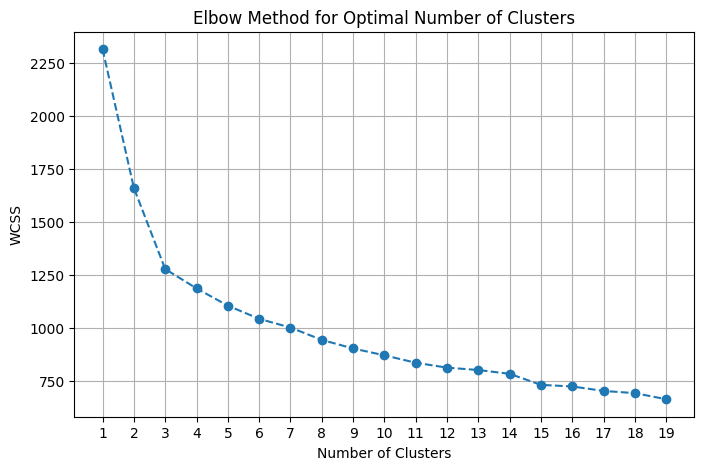

In [28]:
#USING ELBOW METHOD TO DERMINE OPTIMAL NO OF CLUSTER
wcss = []
for i in range(1,20):
    k_model = KMeans(n_clusters=i,random_state=2,init='k-means++')
    k_model.fit(X_scaled)
    wcss.append(k_model.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 20), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 20))
plt.grid()
plt.show()

#FROM GRAPH BELOW OPTIMAL CLUSTERS = 3

In [29]:
#training GAUSSIAN MIXTUREMODEL
gmm_model = GaussianMixture(n_components=3,random_state=2)
gmm_model.fit(X_scaled)
gmm_labels = gmm_model.predict(X_scaled)

gmm_silhouette_score = silhouette_score(X_scaled,gmm_labels)
print(f'Silhouette Score of GMM = {gmm_silhouette_score:.3f}')



Silhouette Score of GMM = 0.28485891918989864


In [31]:
#training kmeans on n_clusters = 3
k_model = KMeans(n_clusters=3,init='k-means++',random_state=3)
k_labels = k_model.fit_predict(X_scaled)
k_model_silhouette_score = silhouette_score(X_scaled,k_labels)
print(f'Silhouette Score of KMeans = {k_model_silhouette_score:.3f}')



Silhouette Score of KMeans = 0.28485891918989864
Silhouette Score of GMM = 0.28485891918989864


In [58]:
agglo_model = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo_model.fit_predict(X_scaled)
agglo_model_silhouette_score = silhouette_score(X_scaled,agglo_labels)

print(f'Silhouette Score of AgglomerativeClustering = {agglo_model_silhouette_score:.3f}')


Silhouette Score of AgglomerativeClustering = 0.2774439826952266


In [70]:
dbscan_model = DBSCAN(eps=1,min_samples=10)
dbscan_labels = dbscan_model.fit_predict(X_scaled)
dbscan_silhouette_score = silhouette_score(X_scaled,dbscan_labels)

print(f'Silhouette Score of DBSCAN = {dbscan_silhouette_score}')
#too bad, predicted only one label

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

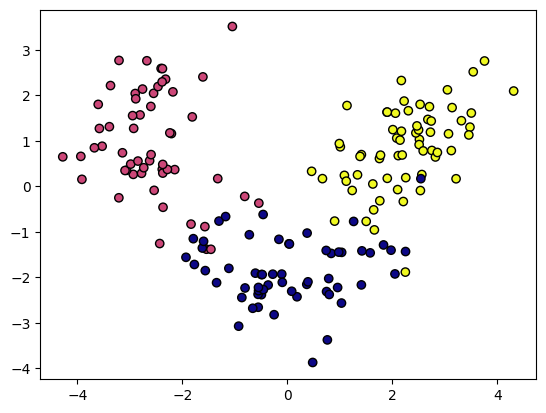

In [59]:
xy = PCA(n_components=2)
xy = xy.fit_transform(X_scaled)
x,y = xy[:,0],xy[:,1]
# plt.scatter(x,y ,c = k_labels,cmap='Accent',edgecolors='k')
# plt.scatter(x,y ,c = gmm_labels,cmap='plasma',edgecolors='k')
plt.scatter(x,y ,c = agglo_labels,cmap='plasma',edgecolors='k')
